### Andrey Nagatani -- BP3044505

# Data Science Aplicada à Área de Saúde

## Projeto Especial - Análise Exploratória Para Dados de Previsão de Custos Médicos

Neste projeto seu trabalho é preparar e analisar o dataset para modelagem preditiva, quando iremos prever o custo de despesas médicas para uma amostra da população de pacientes de um hospital, considerando o hábito de fumar, idade, sexo, IMC e região. 

O dataset fornecido a você apresenta problemas que devem ser resolvidos. Você encontrará algumas perguntas que devem ser respondidas através de análise exploratória e visualização de dados.

Dicionário de Dados:
    
- idade: idade do paciente

- sexo: sexo do paciente (feminino, masculino)

- IMC: índice de massa corporal, usando a razão entre altura e peso (idealmente 18,5 a 24,9)

- filhos: número de filhos do paciente

- fumante: se fuma ou não

- região: a área residencial do paciente.

- custo_medico_anual: custo médico anual do paciente em uma clínica medica (variável alvo)

Para guiá-lo pelo projeto, deixamos comentários nas células abaixo com sugestões de atividades que devem ser realizadas. 

Ao final você deverá apresentar dois modelos (Regressão Linear e Random Forest Regressor) como soluções e indicar o melhor em sua conclusão.

In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

Instalar os pacotes a serem usados no ambiente virtual python `.venv`

In [20]:
%pip install numpy pandas seaborn matplotlib scikit-learn

  Using cached scikit_learn-1.7.2-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.4 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 46.2 MB/s  0:00:00 eta 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Versão do pandas
pd.__version__

'2.3.3'

In [5]:
# Versão do numpy
np.__version__

'2.3.5'

In [6]:
# Versão do seaborn
sns.__version__

'0.13.2'

In [2]:
# Importar o matplotlib e solicitar sua versão
import matplotlib as plt
plt.__version__

'3.10.7'

In [7]:
# Carregando o dataset custos_seguro.csv
arquivo_csv = 'data/custos_seguro.csv'
df = pd.read_csv(arquivo_csv)

In [8]:
# Visualizando alguns registros do dataset
df.head()

,idade,sexo,imc,filhos,fumante,regiao,custo_medico_anual
0,19,feminino,27.90,0,yes,sudeste,16884.92400
1,18,masculino,33.77,1,no,sul,1725.55230
2,28,masculino,33.00,3,no,sul,4449.46200
3,33,masculino,NaN,0,no,nordeste,21984.47061
4,32,masculino,28.88,0,no,nordeste,3866.85520


In [9]:
# Visualizando os tipos de dados
df.dtypes

idade                   int64
sexo                   object
imc                   float64
filhos                  int64
fumante                object
regiao                 object
custo_medico_anual    float64
dtype: object

In [10]:
# Visualizando o total de linhas por coluna
df.shape

(1338, 7)

In [11]:
# Verifique se há valores ausentes
df.isnull().sum()

idade                  0
sexo                   0
imc                   13
filhos                 0
fumante                0
regiao                 0
custo_medico_anual     0
dtype: int64

In [ ]:
# Crie uma função para calcular a média aritmética e fazer a inferencia de dados ausentes.
def preencher_media(coluna):
    media = coluna.mean()
    coluna_preenchida = coluna.fillna(media)
    return coluna_preenchida


In [ ]:
# Aplique a função para as colunas que contém valores nulos NaN.
# Aplicar a função para preencher valores ausentes na coluna 'imc'
df['imc'] = preencher_media(df['imc'])

In [13]:
# Verificando, novamente, se há valores missing (nulos) ou ausentes no dataset.
df.isnull().sum()

idade                 0
sexo                  0
imc                   0
filhos                0
fumante               0
regiao                0
custo_medico_anual    0
dtype: int64

In [19]:
# Verifique se há valores outliers
def detectar_outliers(coluna):
    Q1 = coluna.quantile(0.25)
    Q3 = coluna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = coluna[(coluna < limite_inferior) | (coluna > limite_superior)]
    return outliers

# Detectar outliers na coluna 'imc'
outliers_imc = detectar_outliers(df['imc'])
print(outliers_imc)

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: imc, dtype: float64


In [24]:
# Convertendo todas as variáveis para o tipo numérico inteiro a fim de calcular as correlações
df_numeric = df.copy()
df_numeric['imc'] = df_numeric['imc'].astype(int)
df_numeric['custo_medico_anual'] = df_numeric['custo_medico_anual'].astype(int)
df_numeric.dtypes


idade                  int64
sexo                  object
imc                    int64
filhos                 int64
fumante               object
regiao                object
custo_medico_anual     int64
dtype: object

In [25]:
# Do pacote sklearn importe a classe LabelEncoder para transformar as colunas o dataset em int64.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_numeric['sexo'] = le.fit_transform(df_numeric['sexo'])
df_numeric['fumante'] = le.fit_transform(df_numeric['fumante'])
df_numeric['regiao'] = le.fit_transform(df_numeric['regiao'])


In [26]:
# Visualizando os tipos de dados do dataset_transformado.
df_numeric.dtypes

idade                 int64
sexo                  int64
imc                   int64
filhos                int64
fumante               int64
regiao                int64
custo_medico_anual    int64
dtype: object

In [27]:
# Exiba os primeiros dados do novo dataset_transformado
df_numeric.head()

,idade,sexo,imc,filhos,fumante,regiao,custo_medico_anual
0,19,0,27,0,1,2,16884
1,18,1,33,1,0,3,1725
2,28,1,33,3,0,3,4449
3,33,1,30,0,0,0,21984
4,32,1,28,0,0,0,3866


## Quais variáveis tem maior correlação com o custo_medico_anual?

Construa um heatmap com os dados transformados para mostrar suas conclusões.

In [29]:
# Calcule a matriz de correlação do dataset_transformado
correlation_matrix = df_numeric.corr()
correlation_matrix

,idade,sexo,imc,filhos,fumante,regiao,custo_medico_anual
idade,1.000000,-0.020856,0.105168,0.042469,-0.025019,-0.005212,0.299009
sexo,-0.020856,1.000000,0.048592,0.017163,0.076185,0.016121,0.057293
imc,0.105168,0.048592,1.000000,0.012316,0.000955,0.262815,0.195561
filhos,0.042469,0.017163,0.012316,1.000000,0.007673,-0.019257,0.067999
fumante,-0.025019,0.076185,0.000955,0.007673,1.000000,0.053930,0.787251
regiao,-0.005212,0.016121,0.262815,-0.019257,0.053930,1.000000,0.056993
custo_medico_anual,0.299009,0.057293,0.195561,0.067999,0.787251,0.056993,1.000000


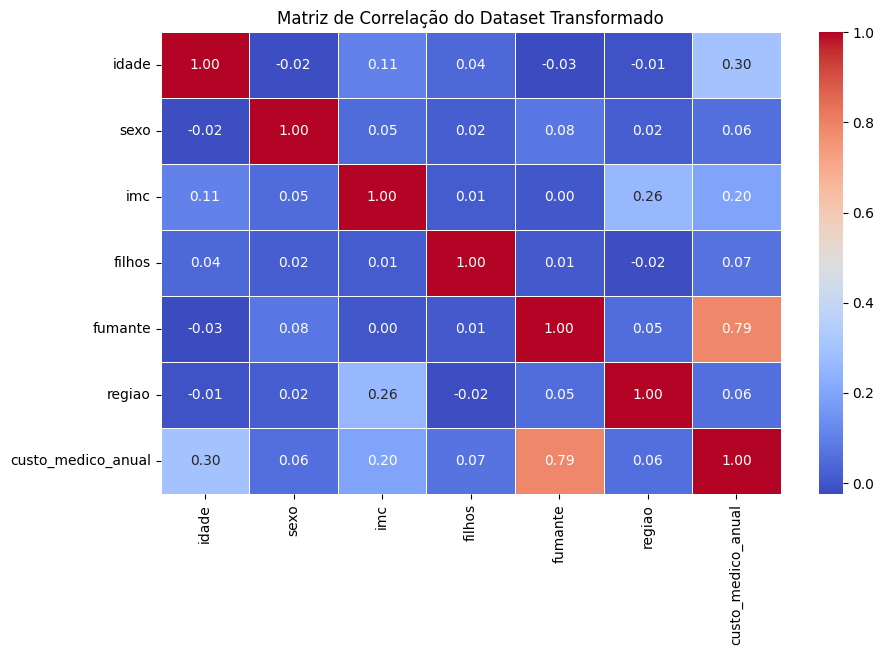

In [30]:
# construindo um mapa de calor (heatmap) para visualizar a matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação do Dataset Transformado')
plt.show()

## Entre fumantes e não fumantes, qual grupo tem maior custo_medico_anual?

Dica: Um facetgrid do Seaborn com dois plots univariados (de uma única variável com dois valores), ajuda a visualizar a resposta. Facetgrid é uma área de plotagem que pode ser divida em duas ou mais áreas. Neste caso a variável a ser estudada é "fumantes". Ela é uma variável com dois valores (yes/no) e deverá ser realacionada à variável "custo medico anual". Será criado um gráfico com duas relações. Uma para fumantes e outra para não fumantes, ambas, relacionadas com o custo medico anual.

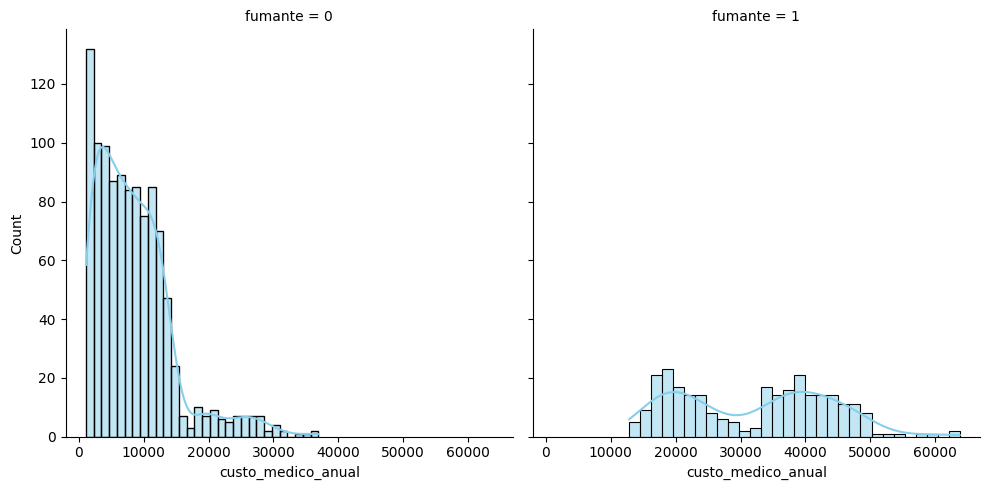

In [32]:
#facetgrid entre fumantes e custo médico anual
g = sns.FacetGrid(df_numeric, col="fumante", height=5)
g.map(sns.histplot, "custo_medico_anual", bins=30,
        kde=True, color="skyblue")
plt.show()

## Qual faixa etária apresenta maior custo_medico_anual?

Construa uma visualização com os dados transformados para suportar suas conclusões.

Utilize um gráfico de barras com uma linha de tendência.

Atenção: A pergunta irá envolver a variável 'idade', mas, não é uma idade e sim uma faixa etária.

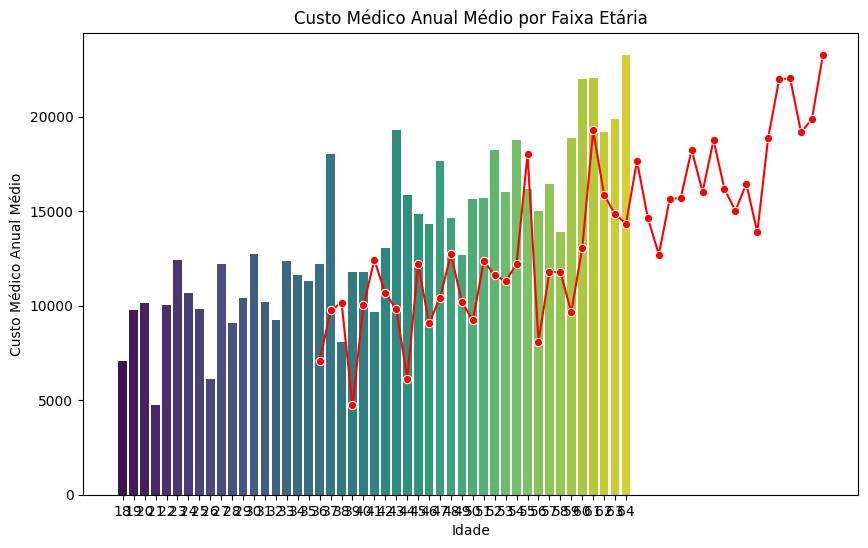

In [36]:
# Calcular a faixa etaria que apresenta o maior custo médico anual médio com um grafico de barras com uma linha de tendencia
plt.figure(figsize=(10, 6))
age_cost = df_numeric.groupby('idade')['custo_medico_anual'].mean().reset_index()
age_cost.columns = ['idade', 'custo_medio']
sns.barplot(x='idade', y='custo_medio', data=age_cost, palette='viridis')
sns.lineplot(x='idade', y='custo_medio', data=age_cost, color='red', marker='o')
plt.title('Custo Médico Anual Médio por Faixa Etária')
plt.xlabel('Idade')
plt.ylabel('Custo Médico Anual Médio')
plt.show()

## A proporção de fumantes por sexo é semelhante ou precisamos balancear esses dados?

Construa uma visualização para suportar suas conclusões.

Faça uma solução com seaborn
O método catplot vai construir um grafico de barras para comparar fumantes do sexo masculino e feminino.
O eixo de x recebe os dados da variável fumante, onde, 0 são não fumantes e 1 fumantes.

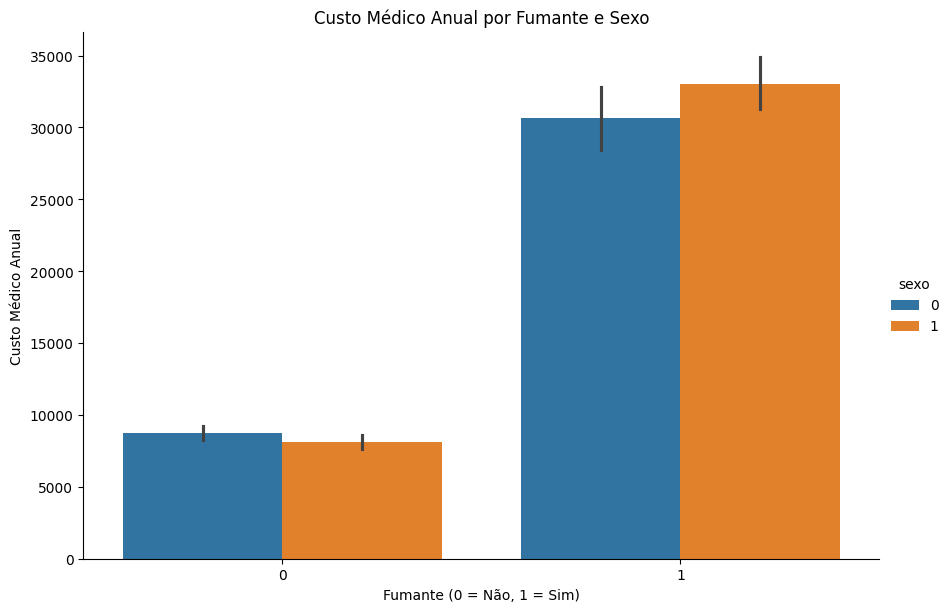

In [37]:
# Comparacao de fumantes divididos por sexo
sns.catplot(x='fumante', y='custo_medico_anual', hue='sexo', data=df_numeric, kind='bar', height=6, aspect=1.5)
plt.title('Custo Médico Anual por Fumante e Sexo')
plt.xlabel('Fumante (0 = Não, 1 = Sim)')
plt.ylabel('Custo Médico Anual')
plt.show()

## À medida que a idade do paciente aumenta o que acontece com o custo_medico_anual? Há diferença entre fumantes e não fumantes?

Construa uma visualização para suportar suas conclusões. A função lmplot do Seaborn pode responder as duas perguntas com facilidade.

Solução com Seaborn e Regressão Linear

Será construído um gráfico em função das idades com relação ao custo médico anual de fumantes e não fumantes, ou seja, serão três variáveis num único gráfico.

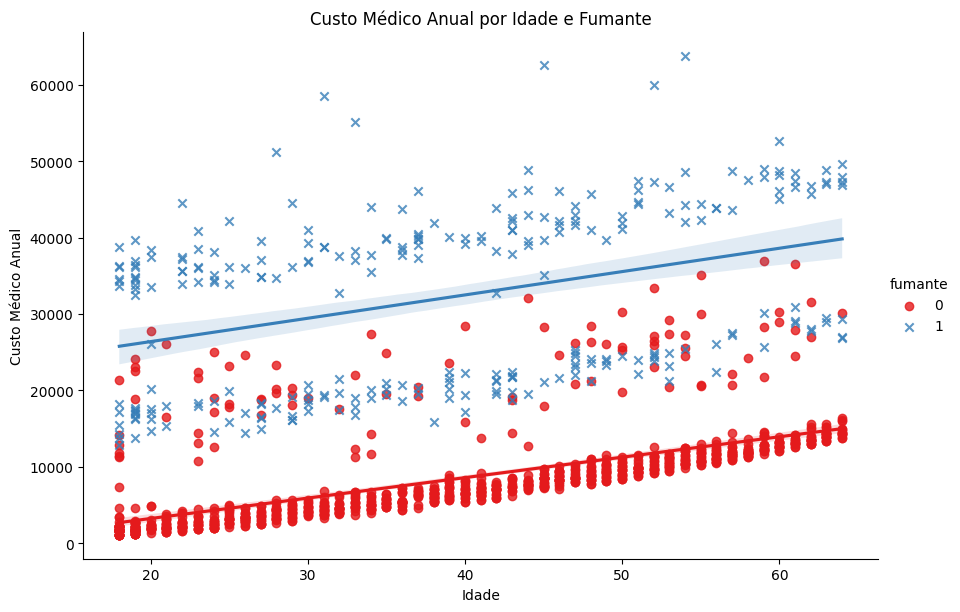

In [38]:
#Custo medio anual por idade e fumantes
sns.lmplot(x='idade', y='custo_medico_anual', hue='fumante', data=df_numeric, height=6, aspect=1.5, markers=['o', 'x'], palette='Set1')
plt.title('Custo Médico Anual por Idade e Fumante')
plt.xlabel('Idade')
plt.ylabel('Custo Médico Anual')
plt.show()

## Construção do Modelo Preditivo

### Preparação dos Dados

Para este projeto, nossa variável target é um valor numérico (custo_medico_anual) e usaremos regressão para construir o modelo preditivo. Algumas transformações nos dados serão necessárias.

A função `pandas.get_dummies` converte os vetores de características categóricas em uma matriz vetorial com valores booleanos de uns e zeros. Isso será mais útil, pois nosso regressor tratará as entradas como números.

Aqui está um exemplo de como funciona:

$\vec{b}=\beta \vec{x}$

Observe como a matriz de variáveis dummies é representada para o recurso categórico de fumante:

$$\begin{pmatrix}\text{fumante_yes}\\ \text{fumante_no}\\ \text{fumante_no}\\ \vdots  \end{pmatrix}=\begin{bmatrix}
    1 & 0 \\
    0 & 1\\
    0 & 1\\
    \vdots & \vdots \\
    \end{bmatrix} \; 
    \begin{pmatrix}\text{fumante_yes} \\  \text{fumante_no} \\ \end{pmatrix}$$

A primeira coluna (coluna zero) para fumantes. Quem é fumante (yes) recebe o valor 1 (um) e quem não é fumante recebe o valor 0 (zero). 
A segunda coluna (coluna 1) para não fumantes, quem não é fumante (no) recebe o valor 1 (um) e quem é fumante recebe o valor 0 (zero).
A obtenção da variável dummy é feito em colunas separadas.
Ao final, exiba os dados transformados.

In [39]:
# Dados após a fase de pré-processamento nos itens anteriores
# Exibindo o dataset original.
df_numeric.head()


,idade,sexo,imc,filhos,fumante,regiao,custo_medico_anual
0,19,0,27,0,1,2,16884
1,18,1,33,1,0,3,1725
2,28,1,33,3,0,3,4449
3,33,1,30,0,0,0,21984
4,32,1,28,0,0,0,3866


### Label Encoding

Prepare as variáveis dummy (converte variáveis categóricas para representações numéricas com Label Encoding) utilizando O método get_dummies que recebe o dataset, converte as variáveis categóricas (boleanas) para variáveis numéricas utilizando Label Encoding do pandas e grava novamente na variável dataset, ou seja, os valores serão sobrescritos.

In [40]:
df_numeric = pd.get_dummies(df_numeric, columns=['sexo', 'fumante', 'regiao'], drop_first=True)
df_numeric.head()

,idade,imc,filhos,custo_medico_anual,sexo_1,fumante_1,regiao_1,regiao_2,regiao_3
0,19,27,0,16884,False,True,False,True,False
1,18,33,1,1725,True,False,False,False,True
2,28,33,3,4449,True,False,False,False,True
3,33,30,0,21984,True,False,False,False,False
4,32,28,0,3866,True,False,False,False,False


### Faça a Divisão dos dados em x e y

Em x deve-se armazenar os dados de entrada e em y os dados de saída.

Em x serão armazenadas todas as colunas, exceto, custo_medico_anual que deverá ser armazenada em y (target). Então, essa coluna deve ser deletada do dataset principal.

In [ ]:
X = df_numeric.drop('custo_medico_anual', axis=1)
y = df_numeric['custo_medico_anual']

### Divisão dos Dados em Treino e Teste

Do pacote sklearn, importe a classe train_test_split

In [42]:
from sklearn.model_selection import train_test_split

### Aplique a função train_test_split com 10% dos dados para teste

A função train_test_split retorna 4 valores, dois para x (treino e teste) 

In [ ]:
# dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=42)

Regressão Linear é um tipo básico de algoritmo preditivo capaz de encontrar uma relação entre duas ou mais variáveis. O modelo basicamente ajusta uma equação linear entre os dados observados. Em uma Regressão Linear, temos as variáveis de entrada(x) e a variável de saída(y). Quando x é uma variável única no modelo, chamamos de Regressão Linear Simples e quando há múltiplas entradas, chamamos de Regressão Linear Múltipla.

In [48]:
# Importe o pacote sklearn e mostre sua versão
import sklearn
sklearn.__version__

'1.7.2'

### Crie a primeira versão do modelo utilizando Regressão Linear

In [51]:
# Importe o sklearn e a classe LinearRegression
# Importe a classe r2_score para métrica de aprendizado
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()

In [52]:
# Criando o modelo de regressão linear
modelo1 = lr.fit(X_train, y_train)

In [53]:
# Verificando o score do modelo nos dados de treino
modelo1.score(X_train, y_train)

0.7422666958172986

In [54]:
# Verificando o score do modelo nos dados de teste
modelo1.score(X_test, y_test)

0.7828313050328601

### Crie a Segunda versão do modelo utilizando RandomForestRegressor

Exiba a métrica r2_Score para essa versão.

In [55]:
# Criando o segundo modelo com RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo2 = rf.fit(X_train, y_train)

In [ ]:
# Verificando o score do modelo2 nos dados de teste
modelo2.score(X_test, y_test)

0.8496292508472316

In [57]:
# Verificando o score do modelo2 nos dados de teste
modelo2.score(X_test, y_test)

0.8496292508472316

### Descreva sua Conclusão


O modelo de Regressão Linear apresentou um desempenho razoável, mas o modelo Random ForestRegressor superou significativamente, indicando que ele é mais eficaz para prever os custos médicos anuais com base nos dados fornecidos.


# Fim